In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\master\Downloads\Iris (1).csv")
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df["SepalLengthCm"].mean()

5.843333333333334

In [7]:
df["SepalLengthCm"].median()

5.8

In [8]:
df.shape

(150, 5)

In [ ]:
for i in df.select_dtypes(include="object"):
    

<Axes: >

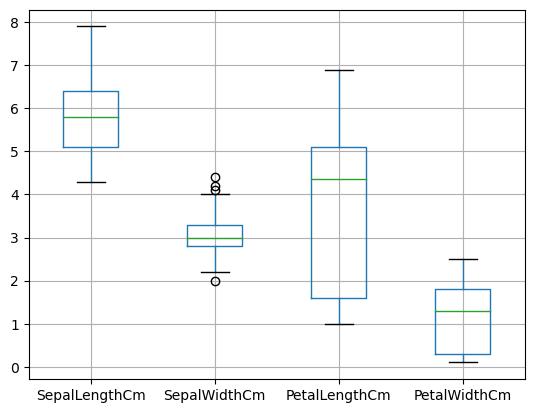

In [16]:
df.boxplot()

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

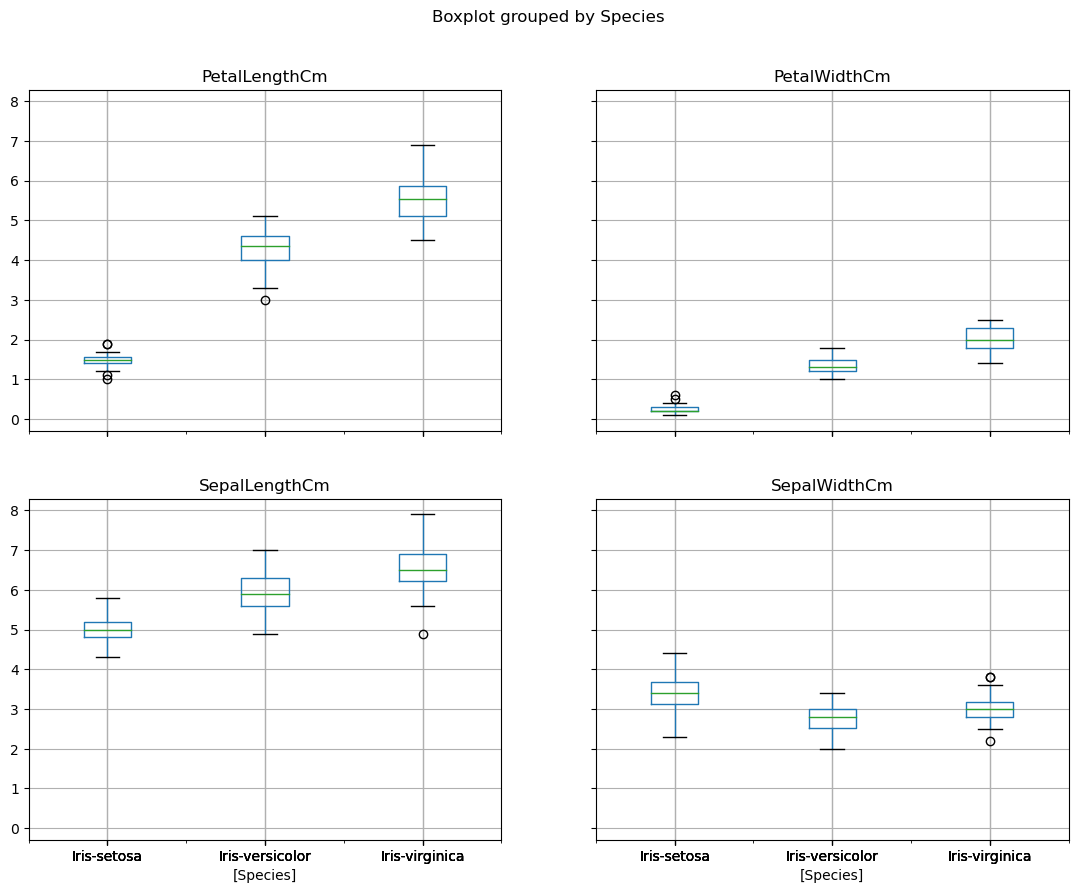

In [11]:
df.boxplot(by="Species", figsize=(13,10))

<Axes: ylabel='Density'>

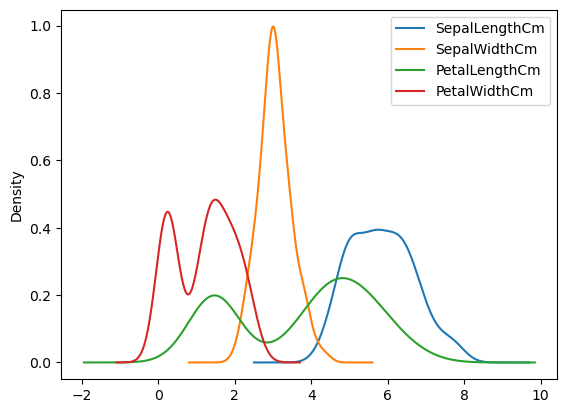

In [12]:
df.plot(kind="kde")

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

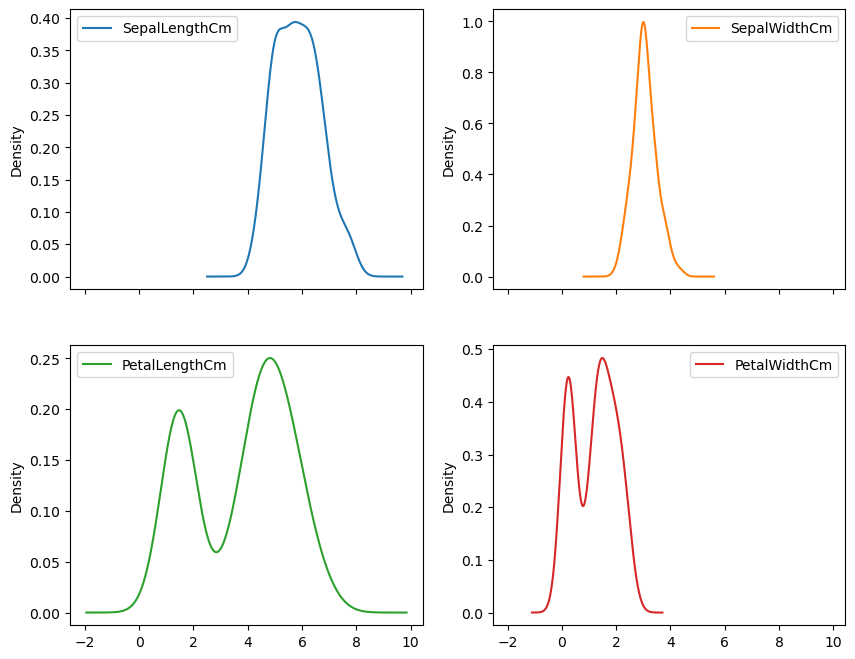

In [15]:
df.plot(kind="kde", subplots=True, layout=(2,2), figsize=(10,8))

### Segregate input & output

In [9]:
y = df["Species"]
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

### Split the data into train & test

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [11]:
X_train.shape

(105, 4)

In [12]:
X_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000
mean,5.893333,3.044762,3.828571,1.226667
std,0.876868,0.441366,1.804573,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


### Data Preparation on Train data

In [71]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_transformed = ss.fit_transform(X_train)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_transformed = le.fit_transform(y_train)

### Build the Model using Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_transformed, y_train_transformed)

LogisticRegression()

### Data Preparation on Train data

In [74]:
X_test_transformed = ss.transform(X_test)

y_test_transformed = le.transform(y_test)

### Predict on test data

In [75]:
y_test_predict = model.predict(X_test_transformed)

### Evaluation: Calculate the score

In [76]:
from sklearn import metrics
metrics.accuracy_score(y_test_transformed,y_test_predict)

0.9777777777777777

In [59]:
from sklearn import metrics
metrics.r2_score(y_test_transformed,y_test_predict)

0.9621848739495799

### Build the Model using KNN Regression

In [41]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(X_train_transformed, y_train_transformed)

KNeighborsRegressor()

In [77]:
X_test_transformed = ss.transform(X_test)
y_test_transformed = le.transform(y_test)

y_test_predict = model.predict(X_test_transformed)

from sklearn import metrics
metrics.accuracy_score(y_test_transformed, y_test_predict)

0.9777777777777777

In [68]:
X_test_transformed = ss.transform(X_test)
y_test_transformed = le.transform(y_test)

y_test_predict = model.predict(X_test_transformed)

from sklearn import metrics
metrics.r2_score(y_test_transformed,y_test_predict)

0.9635386554621849

### Build the Model using Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train_transformed, y_train_transformed)

DecisionTreeRegressor()

In [78]:
X_test_transformed = ss.transform(X_test)
y_test_transformed = le.transform(y_test)

y_test_predict = model.predict(X_test_transformed)

from sklearn import metrics
metrics.accuracy_score(y_test_transformed,y_test_predict)

0.9777777777777777

### Build the Model using Random Forest Regression

In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train_transformed, y_train_transformed)

RandomForestRegressor()

In [79]:
X_test_transformed = ss.transform(X_test)
y_test_transformed = le.transform(y_test)

y_test_predict = model.predict(X_test_transformed)

from sklearn import metrics
metrics.accuracy_score(y_test_transformed,y_test_predict)

0.9777777777777777